In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import requests as r
from io import BytesIO
from sklearn.impute import KNNImputer
import requests as rq

In [2]:
levels_fyi=pd.read_csv("https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/Levels_Fyi_Salary_Data.csv")

In [3]:
levels_fyi.shape


(62642, 29)

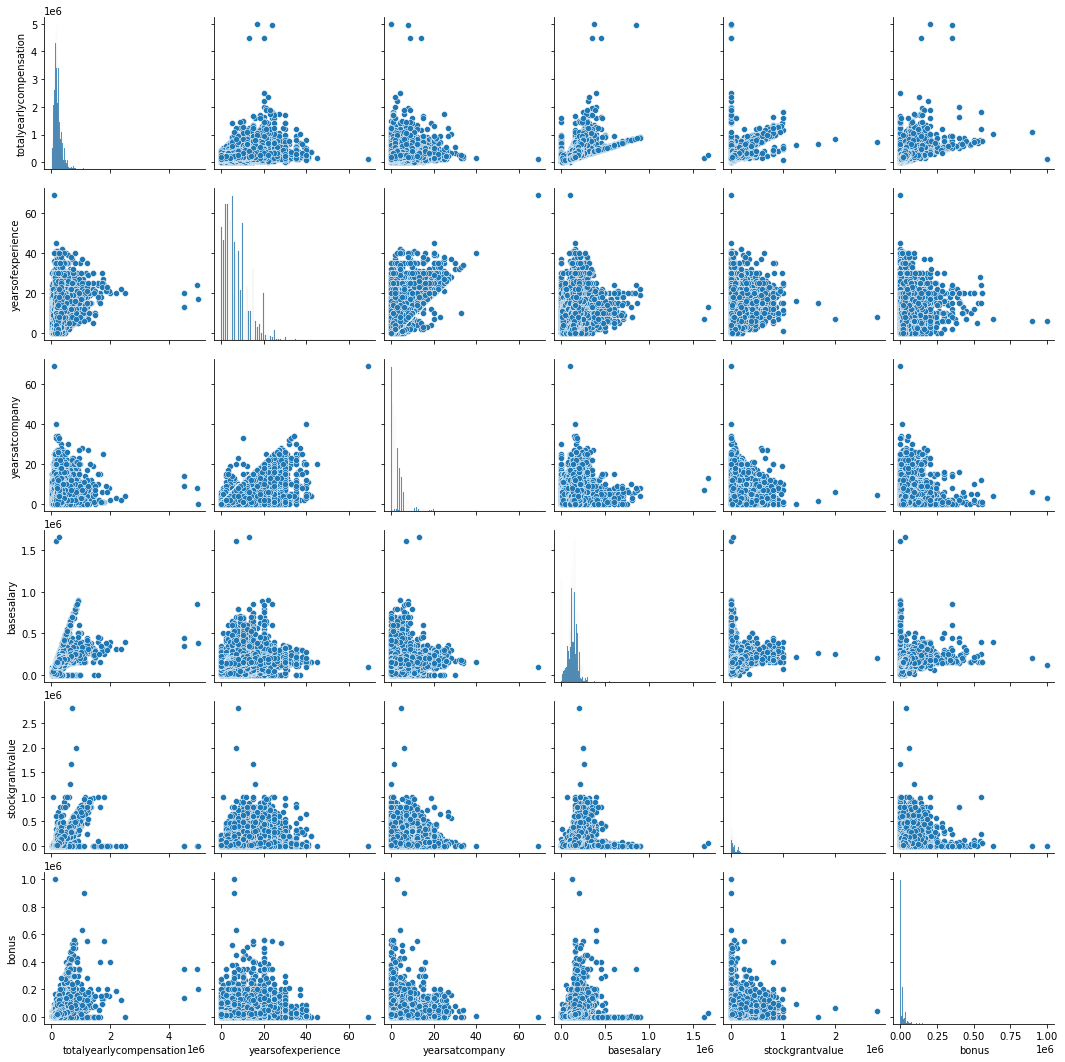

In [4]:
sns.pairplot(
    levels_fyi[['company','level','title','totalyearlycompensation','location','yearsofexperience','yearsatcompany',
                'basesalary','stockgrantvalue','bonus','Race','Education']]
    
)

<AxesSubplot:>

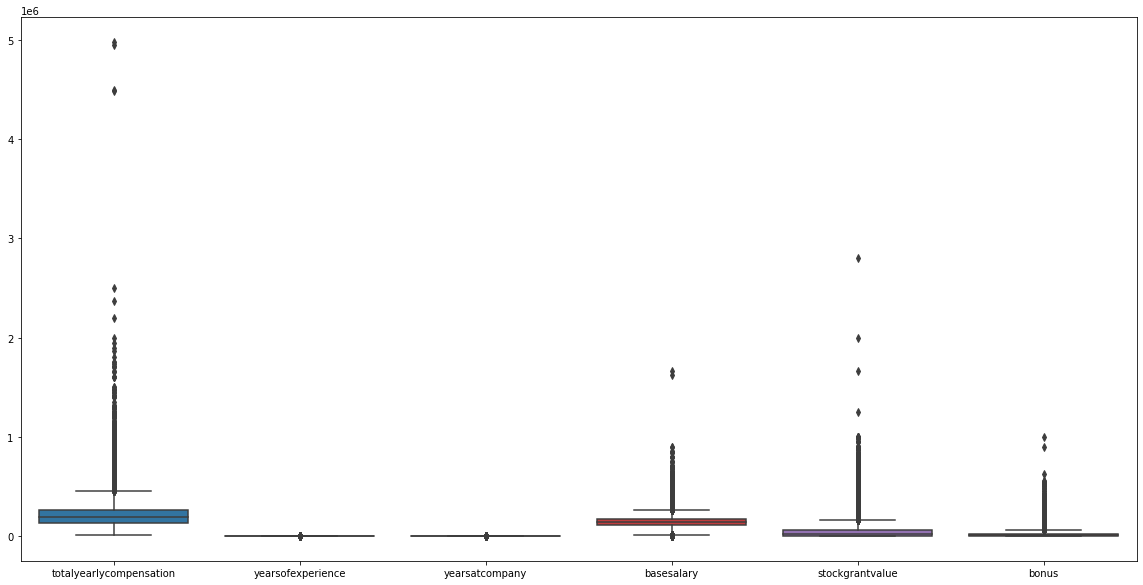

In [5]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(data=levels_fyi[['totalyearlycompensation','yearsofexperience','yearsatcompany',
                'basesalary','stockgrantvalue','bonus']])

In [6]:
cleaned_data=levels_fyi

split_data = cleaned_data["location"].str.split(",")
data = split_data.to_list()
names = ["city","state","country","area"]
city_state_split = pd.DataFrame(data, columns=names)
city_state_split

cleaned_data['city']=city_state_split['city']
cleaned_data['state']=city_state_split['state']
cleaned_data['country']=city_state_split['country']
cleaned_data['area']=city_state_split['area']
cleaned_data=cleaned_data.drop(['location'], axis = 1)
cleaned_data['state'].str.strip()
cleaned_data['state'] = cleaned_data['state'].str.replace(r'\s+', ' ')
cleaned_data['state'] = cleaned_data['state'] .str.strip().str.lower()


In [7]:
arr=[]

def overview_stock(val):
    if (val == None):

        arr.append(False) 
    else:

        arr.append(None)


In [8]:
count=0
count_val = 0
for i in cleaned_data['country']:
    value =overview_stock(i)



In [9]:
cleaned_data['country']=arr

In [10]:
levels_fyi = levels_fyi.dropna(axis=0, subset=['country'])

In [11]:
states_abbreviation=pd.read_csv("https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/latlon.csv")
states_abbreviation['state'] = states_abbreviation['state'].str.replace(r'\s+', ' ')
states_abbreviation['state'] = states_abbreviation['state'] .str.strip().str.lower()


In [12]:
mergred_states_abbreviation = pd.merge(states_abbreviation,cleaned_data,how='inner',on=['state','state'])
mergred_states_abbreviation

,state,latitude,longitude,name,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,country,area
0,al,32.318231,-86.902298,Alabama,5/2/2019 21:30:01,Saic,Software engineer,Software Engineer,84000,3.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
1,al,32.318231,-86.902298,Alabama,1/11/2020 16:34:45,SAIC,1,Software Engineer,70000,2.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
2,al,32.318231,-86.902298,Alabama,4/18/2020 5:46:33,Raytheon Technologies,G7,Software Engineer,112000,5.0,...,0,0,0,0,0,NaN,Master's Degree,Huntsville,False,None
3,al,32.318231,-86.902298,Alabama,4/21/2020 17:03:48,SAIC,Software Engineer Associate,Software Engineer,71000,2.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
4,al,32.318231,-86.902298,Alabama,5/28/2020 20:49:45,Northrop Grumman,Level2,Software Engineer,84000,2.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53516,wv,38.597626,-80.454903,West Virginia,12/14/2020 11:45:35,Procter & Gamble,Entry Level,Mechanical Engineer,80000,0.0,...,0,0,0,0,0,NaN,Bachelor's Degree,Martinsburg,False,None
53517,wv,38.597626,-80.454903,West Virginia,12/18/2020 21:51:37,Procter & Gamble,entry level product supply,Mechanical Engineer,80000,0.0,...,0,0,0,0,0,NaN,Bachelor's Degree,Inwood,False,None
53518,wv,38.597626,-80.454903,West Virginia,6/14/2021 1:52:53,Google,L5,Software Engineer,235000,11.0,...,0,1,0,0,0,White,Bachelor's Degree,London,False,None
53519,wv,38.597626,-80.454903,West Virginia,7/21/2021 20:50:58,Infor,L1,Software Engineer,65000,1.0,...,0,1,0,0,0,White,Highschool,Charleston,False,None


In [15]:
url = "https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/weather_data.xlsx"
data = rq.get(url).content
waether_data = pd.read_excel(BytesIO(data))

In [16]:
waether_data.head()

,name,Avg °F,Avg °C,Rank
0,Alabama,62.8,17.1,7
1,Alaska,26.6,-3.0,50
2,Arizona,60.3,15.7,10
3,Arkansas,60.4,15.8,9
4,California,59.4,15.2,12


In [17]:
mergred_waether_data = pd.merge(waether_data,mergred_states_abbreviation,how='inner',on=['name','name'])
mergred_waether_data

,name,Avg °F,Avg °C,Rank,state,latitude,longitude,timestamp,company,level,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,country,area
0,Alabama,62.8,17.1,7,al,32.318231,-86.902298,5/2/2019 21:30:01,Saic,Software engineer,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
1,Alabama,62.8,17.1,7,al,32.318231,-86.902298,1/11/2020 16:34:45,SAIC,1,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
2,Alabama,62.8,17.1,7,al,32.318231,-86.902298,4/18/2020 5:46:33,Raytheon Technologies,G7,...,0,0,0,0,0,NaN,Master's Degree,Huntsville,False,None
3,Alabama,62.8,17.1,7,al,32.318231,-86.902298,4/21/2020 17:03:48,SAIC,Software Engineer Associate,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
4,Alabama,62.8,17.1,7,al,32.318231,-86.902298,5/28/2020 20:49:45,Northrop Grumman,Level2,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52870,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,9/6/2018 16:51:10,Epic Systems,Software Developer,...,0,0,0,0,0,NaN,NaN,Madison,False,None
52871,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,9/6/2018 20:26:44,Epic Systems,Software Developer,...,0,0,0,0,0,NaN,NaN,Madison,False,None
52872,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,4/17/2019 10:21:14,Epic Systems,Entry,...,0,0,0,0,0,NaN,NaN,Verona,False,None
52873,Wisconsin,43.1,6.2,43,wi,43.784440,-88.787868,7/3/2018 6:56:44,Microsoft,62,...,0,0,0,0,0,NaN,NaN,Hilbert,False,None


In [18]:
url = "https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/livalbility_score.xlsx"
data = rq.get(url).content
livalbility_score = pd.read_excel(BytesIO(data))

In [19]:
livalbility_score.head()

,overall rank,name,total score,affordability,economy,education and health,quality of life,safety
0,1,New Jersey,63.01,49,32,5,7.0,1.0
1,2,Massachusetts,62.60,45,12,1,5.0,5.0
2,3,New York,61.63,47,33,18,1.0,2.0
3,4,Idaho,61.16,15,5,29,25.0,4.0
4,5,Minnesota,60.97,9,16,4,11.0,21.0


In [20]:
mergred_livalbility_score = pd.merge(livalbility_score,mergred_waether_data,how='inner',on=['name','name'])
mergred_livalbility_score

,overall rank,name,total score,affordability,economy,education and health,quality of life,safety,Avg °F,Avg °C,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,country,area
0,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,0,0,0,0,0,NaN,NaN,Hoboken,False,None
1,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,0,0,0,0,0,NaN,NaN,Newark,False,None
2,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,0,0,0,0,0,NaN,NaN,Jersey City,False,None
3,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,0,0,0,0,0,NaN,NaN,Roseland,False,None
4,1,New Jersey,63.01,49,32,5,7.0,1.0,52.7,11.5,...,0,0,0,0,0,NaN,NaN,Whippany,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52870,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,0,1,0,0,0,White,Bachelor's Degree,Albuquerque,False,None
52871,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,0,0,0,0,0,NaN,NaN,Albuquerque,False,None
52872,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,0,1,0,0,0,White,Master's Degree,Albuquerque,False,None
52873,50,New Mexico,38.96,25,48,47,NaN,NaN,53.4,11.9,...,0,0,0,0,0,NaN,NaN,Albuquerque,False,None


In [21]:
url = "https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/tech_employment_count.xlsx"
data = rq.get(url).content
tech_employment_count = pd.read_excel(BytesIO(data))


In [22]:
tech_employment_count.shape

(52, 8)

In [23]:
mergred_tech_employment_count = pd.merge(tech_employment_count,mergred_livalbility_score,how='inner',on=['name','name'])


In [24]:
url = "https://raw.githubusercontent.com/Sowmyadiya/Data245-Project/master/Datasets/population.xlsx"
data = rq.get(url).content
population = pd.read_excel(BytesIO(data))


In [25]:
mergred_population = pd.merge(population,mergred_tech_employment_count,how='inner',on=['name','name'])
mergred_population

,name,Unnamed: 1,population_2020,Unnamed: 3,job_opportunity_rank,Contribution to GDP in 2016 (in billions),Absolute change in GDP since 2014 (in billions),Percent change in GDP since 2014,Employment,Absolute change in employment since 2014,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,country,area
0,Alabama,NaN,5024279,NaN,26.0,3.64,0.35,0.105,26964.0,1723.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
1,Alabama,NaN,5024279,NaN,26.0,3.64,0.35,0.105,26964.0,1723.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
2,Alabama,NaN,5024279,NaN,26.0,3.64,0.35,0.105,26964.0,1723.0,...,0,0,0,0,0,NaN,Master's Degree,Huntsville,False,None
3,Alabama,NaN,5024279,NaN,26.0,3.64,0.35,0.105,26964.0,1723.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
4,Alabama,NaN,5024279,NaN,26.0,3.64,0.35,0.105,26964.0,1723.0,...,0,0,0,0,0,NaN,NaN,Huntsville,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52870,Wisconsin,NaN,5893718,NaN,19.0,7.48,1.77,0.310,45014.0,5745.0,...,0,0,0,0,0,NaN,NaN,Madison,False,None
52871,Wisconsin,NaN,5893718,NaN,19.0,7.48,1.77,0.310,45014.0,5745.0,...,0,0,0,0,0,NaN,NaN,Madison,False,None
52872,Wisconsin,NaN,5893718,NaN,19.0,7.48,1.77,0.310,45014.0,5745.0,...,0,0,0,0,0,NaN,NaN,Verona,False,None
52873,Wisconsin,NaN,5893718,NaN,19.0,7.48,1.77,0.310,45014.0,5745.0,...,0,0,0,0,0,NaN,NaN,Hilbert,False,None


In [26]:
data245_cleaneddata=mergred_population.drop(['Unnamed: 1','Unnamed: 3','Contribution to GDP in 2016 (in billions)',
                                                        'Absolute change in GDP since 2014 (in billions)','Percent change in GDP since 2014',
                                                       'Absolute change in employment since 2014','Percent change in employment since 2014',
                                                       'Avg °F',
                                                       'Avg °C','state','latitude','longitude','city','overall rank','total score',
                                             'population_2020',
                                            'Employment','level','bonus','stockgrantvalue','Masters_Degree','Bachelors_Degree','Doctorate_Degree',
                                            'Highschool','Some_College','yearsatcompany','company','timestamp','dmaid','cityid','gender','Race_White','Race_Asian','Race_Two_Or_More','Race_Black',
                             'Race_Hispanic','Race','rowNumber','otherdetails','country','area','basesalary'], axis = 1)


In [27]:
#Mode imputation
data245_cleaneddata['tag'] = data245_cleaneddata['tag'].fillna(data245_cleaneddata['tag'].mode()[0])

In [ ]:
# KNN imputation

# knn_imputation=data245_cleaneddata.drop(['name','title','tag','Education' ], axis = 1)
# target_knn = data245_cleaneddata['name']
# knn_imputation.dtypes

In [ ]:

# imputer = KNNImputer(n_neighbors=5)
# knn_imputation = pd.DataFrame(imputer.fit_transform(knn_imputation),columns = knn_imputation.columns)
# knn_imputation.isna().sum()

In [ ]:
# data245_cleaneddata['basesalary']=knn_imputation['basesalary']

In [28]:
# equal frequency

def equifreq(arr1, m):
    a = len(arr1)
    n = int(a / m)
    for i in range(0, m):
        arr = []
        for j in range(i * n, ((i + 1) * n)):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        arrar.append(arr)
    print(arrar)




# # equal width
def equiwidth(arr1, m):
    a = len(arr1)
    w = (max(arr1) - min(arr1)) / m
    min1 = min(arr1)
    arr = []
    for i in range(0, m + 1):
        arr = arr + [min1 + w * i]
    arri=[]
    for i in range(0, m):
        temp = []
        for j in arr1:
            if j >= arr[i] and j <= arr[i+1]:
                temp += [j]
        arri += [temp]
    arrar.append(arri)

    


In [29]:
def binning(arr1):
    for j in arr1:
        if j in arrar[0][0]:
            arr_affor.append(0)
        elif j in arrar[0][1]:
            arr_affor.append(1)
        elif j in arrar[0][2]:
            arr_affor.append(2)
        elif j in arrar[0][3]:
            arr_affor.append(3)
        else:
            arr_affor.append(4)
    

In [30]:
affordability=data245_cleaneddata['affordability']
economy = data245_cleaneddata['economy']
safety = data245_cleaneddata['safety']
quality_of_life = data245_cleaneddata['quality of life']
education = data245_cleaneddata['education and health']
job_opportunity_rank = data245_cleaneddata['job_opportunity_rank']
Rank = data245_cleaneddata['Rank']
affordability_unique=data245_cleaneddata['affordability'].unique()
economy_unique = data245_cleaneddata['economy'].unique()
safety_unique = data245_cleaneddata['safety'].unique()
education_unique = data245_cleaneddata['education and health'].unique()
quality_of_life_unique = data245_cleaneddata['quality of life'].unique()
job_opportunity_rank_unique = data245_cleaneddata['job_opportunity_rank'].unique()
Rank_unique = data245_cleaneddata['Rank'].unique()
Rank_unique.sort()
job_opportunity_rank_unique.sort()
m=5

In [31]:
arrar=[]
equiwidth(affordability_unique,m)

arr_affor=[]
binning(affordability) 
data245_cleaneddata['affordability']=arr_affor



In [32]:
arrar=[]
equiwidth(economy_unique,m)

arr_affor=[]
binning(economy) 
data245_cleaneddata['economy']=arr_affor

In [33]:
arrar=[]
equiwidth(safety_unique,m)

arr_affor=[]
binning(safety) 
data245_cleaneddata['safety']=arr_affor

In [34]:
arrar=[]
equiwidth(education_unique,m)

arr_affor=[]
binning(education) 
data245_cleaneddata['education and health']=arr_affor

In [35]:
arrar=[]
equiwidth(quality_of_life_unique,m)

arr_affor=[]
binning(quality_of_life) 
data245_cleaneddata['quality of life']=arr_affor

In [36]:
arrar=[]
equifreq(Rank_unique,m)

arr_affor=[]

for j in Rank:
    if j in arrar[0]:
        arr_affor.append(0)
    elif j in arrar[1]:
        arr_affor.append(1)
    elif j in arrar[2]:
        arr_affor.append(2)
    elif j in arrar[3]:
        arr_affor.append(3)
    else:
        arr_affor.append(4) 
data245_cleaneddata['Rank']=arr_affor

[[1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 25, 26, 27, 28], [29, 30, 32, 33, 34, 35, 36, 37, 39], [40, 42, 43, 44, 45, 46, 47, 48, 49]]


In [37]:
arrar=[]
equiwidth(job_opportunity_rank_unique,m)
print(arrar)
arr_affor=[]
binning(job_opportunity_rank) 
data245_cleaneddata['job_opportunity_rank']=arr_affor

[[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], [11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0], [21.0, 22.0, 23.0, 24.0, 26.0, 27.0, 28.0, 29.0, 30.0], [31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0], [41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 50.0]]]


In [38]:
data245_cleaneddata = data245_cleaneddata.rename(columns={'name': 'state','Rank':'Climate'})

In [40]:
# pip install category_encoders

In [41]:
import category_encoders as ce
import pandas as pd


# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Education'],return_df=True,
                           mapping=[{'col':'Education',
'mapping':{'PhD':0,"Master's Degree":1,"Bachelor's Degree":2,'Highschool':3,'Some College':4}}])

